In [ ]:
# Introduction and Project Overview
"""
California Housing Prices: Predict the median house values in Californian districts,
given a number of features from these districts.

Objective:
- To build a model of housing prices in California using the California census data.
"""

In [14]:
# Get the Data

import os
import tarfile
import urllib.request
import pandas as pd

def fetch_housing_data(housing_url, housing_path):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing_path")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# URL and path setup
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

fetch_housing_data(HOUSING_URL, HOUSING_PATH)
housing = load_housing_data(HOUSING_PATH)


In [15]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


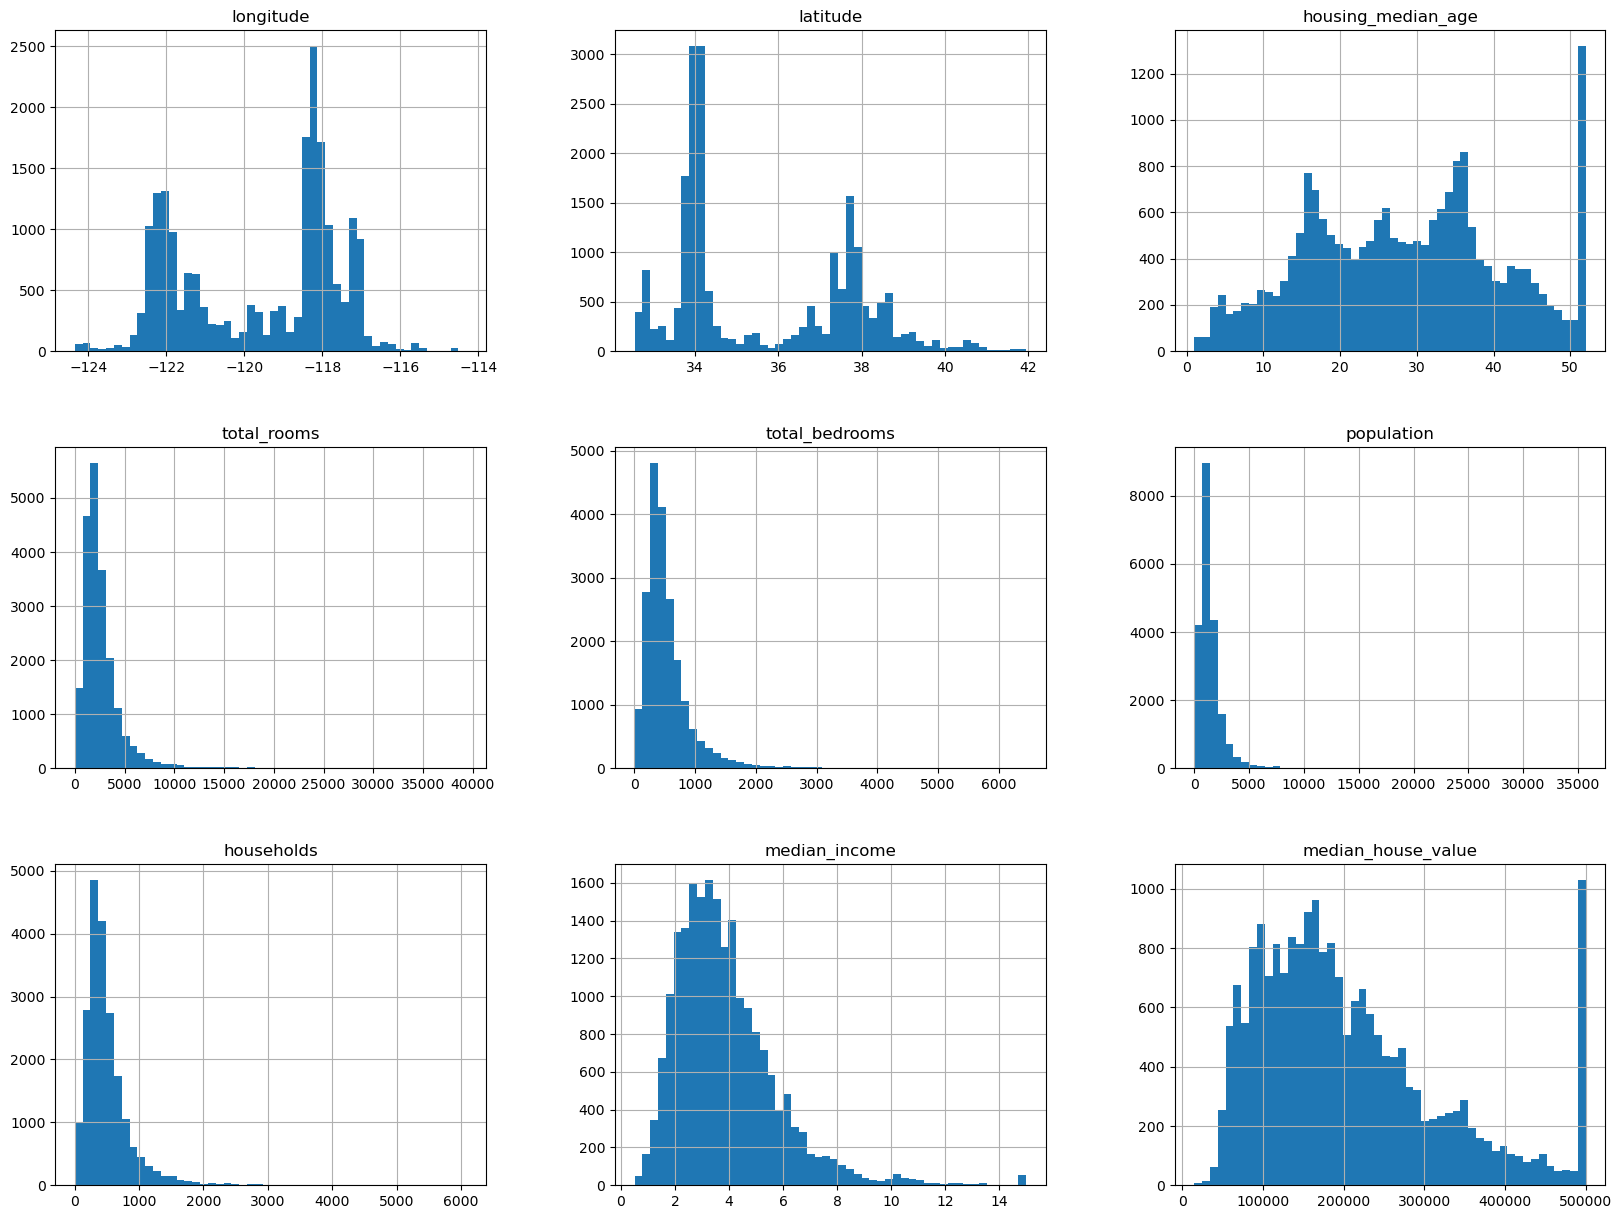

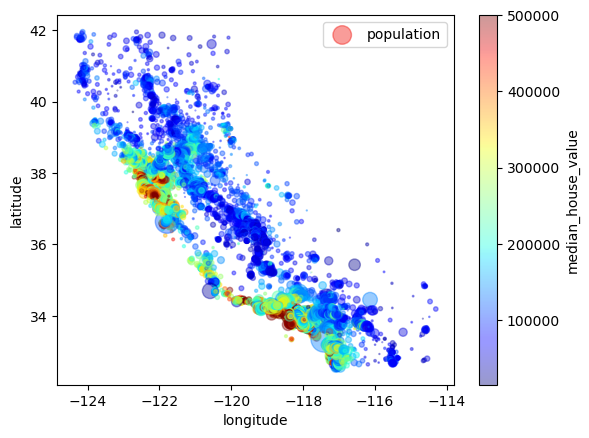

In [10]:
#Explore the Data

%matplotlib inline
import matplotlib.pyplot as plt

# Show histograms of all numerical features
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Plotting geographical data to look for patterns based on location
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [11]:
#Prepare the Data

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np  # Add this line at the beginning of your notebook

# Split data into training and testing sets
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

housing = train_set.drop("median_house_value", axis=1)  # drop labels for training set
housing_labels = train_set["median_house_value"].copy()

# Numerical columns
num_attribs = list(housing.select_dtypes(include=[np.number]))

# Categorical columns
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [12]:
#Shortlist Promising Models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a few models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(housing_prepared, housing_labels)
    housing_predictions = model.predict(housing_prepared)
    mse = mean_squared_error(housing_labels, housing_predictions)
    rmse = np.sqrt(mse)
    print(f"{name} RMSE: {rmse}")

Training Linear Regression...
Linear Regression RMSE: 68433.93736666226
Training Decision Tree...
Decision Tree RMSE: 0.0
Training Random Forest...
Random Forest RMSE: 18056.808794393244
